In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import datetime

In [2]:
#abro la conexión
con = sqlite3.connect("database/ALUAR.db")

In [3]:
#query a la db retorna un dataframe
df2 = pd.read_sql_query("select INDPOT, FT_TURNO, TU_SEMI_TURNO, CUBA, HBD, WRMI, TFOIN, TFAIN, NDAL2O3, NTEA,NIANO from 'HITM_PS'", con)

In [4]:
df2.head()

,INDPOT,FT_TURNO,TU_SEMI_TURNO,CUBA,HBD,WRMI,TFOIN,TFAIN,NDAL2O3,NTEA,NIANO
0,1,2019-06-01 00:00:00,1,501,18.0,52.0,0.0,0.0000,556.0,0.0,0
1,2,2019-06-01 00:00:00,1,502,18.0,55.0,0.0,0.0000,526.0,0.0,0
2,3,2019-06-01 00:00:00,1,503,18.0,53.0,0.0,0.0000,484.0,0.0,0
3,4,2019-06-01 00:00:00,1,504,18.0,72.0,0.0,11.0116,548.0,0.0,0
4,5,2019-06-01 00:00:00,1,505,15.0,68.0,0.0,0.0000,516.0,0.0,0


In [5]:
df2_index = df2.set_index(["FT_TURNO", "TU_SEMI_TURNO", "CUBA"])

In [6]:
df2_index.head()

INDPOT   HBD  WRMI  TFOIN    TFAIN  \
FT_TURNO            TU_SEMI_TURNO CUBA                                       
2019-06-01 00:00:00 1             501        1  18.0  52.0    0.0   0.0000   
                                  502        2  18.0  55.0    0.0   0.0000   
                                  503        3  18.0  53.0    0.0   0.0000   
                                  504        4  18.0  72.0    0.0  11.0116   
                                  505        5  15.0  68.0    0.0   0.0000   

                                        NDAL2O3  NTEA  NIANO  
FT_TURNO            TU_SEMI_TURNO CUBA                        
2019-06-01 00:00:00 1             501     556.0   0.0      0  
                                  502     526.0   0.0      0  
                                  503     484.0   0.0      0  
                                  504     548.0   0.0      0  
                                  505     516.0   0.0      0

In [7]:
# Predicción 1
df2_index["NTEA"].unique()

array([ 0., nan,  1.,  2.,  3.,  4.,  6.])

In [8]:
# Predicción 2
df2_index["NIANO"].unique()

array([0, 1, 2, 3, 4, 5, 6, 8])

In [9]:
nteas = df2_index["NTEA"].unique()
nianos = df2_index["NIANO"].unique()

In [10]:
N = len(df2_index)-df2_index["NTEA"].isna().sum()
for ntea in nteas:
    print(ntea)
    print((df2_index["NTEA"]==ntea).sum()/N)
    print((df2_index["NTEA"]==ntea).sum())
    print()

0.0
0.9931178446785609
487168

nan
0.0
0

1.0
0.006749649368863955
3311

2.0
9.988910271046022e-05
49

3.0
2.0385531165400047e-05
10

4.0
8.154212466160019e-06
4

6.0
4.077106233080009e-06
2



In [11]:
#Filtro las filas en las que NTEA es NaN
df2_index = df2_index[df2_index["NTEA"].isna()==False]

In [12]:
nteas = df2_index["NTEA"].unique()
N = len(df2_index)
for ntea in nteas:
    print(ntea)
    print((df2_index["NTEA"]==ntea).sum()/N)
    print((df2_index["NTEA"]==ntea).sum())
    print()

0.0
0.9931178446785609
487168

1.0
0.006749649368863955
3311

2.0
9.988910271046022e-05
49

3.0
2.0385531165400047e-05
10

4.0
8.154212466160019e-06
4

6.0
4.077106233080009e-06
2



In [13]:
df2_index["label"] = df2_index["NTEA"]>0

In [14]:
del df2_index["INDPOT"]

In [15]:
del df2_index["NTEA"]
del df2_index["NIANO"]

In [16]:
df2_index.head()

HBD  WRMI  TFOIN    TFAIN  NDAL2O3  \
FT_TURNO            TU_SEMI_TURNO CUBA                                        
2019-06-01 00:00:00 1             501   18.0  52.0    0.0   0.0000    556.0   
                                  502   18.0  55.0    0.0   0.0000    526.0   
                                  503   18.0  53.0    0.0   0.0000    484.0   
                                  504   18.0  72.0    0.0  11.0116    548.0   
                                  505   15.0  68.0    0.0   0.0000    516.0   

                                        label  
FT_TURNO            TU_SEMI_TURNO CUBA         
2019-06-01 00:00:00 1             501   False  
                                  502   False  
                                  503   False  
                                  504   False  
                                  505   False

/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


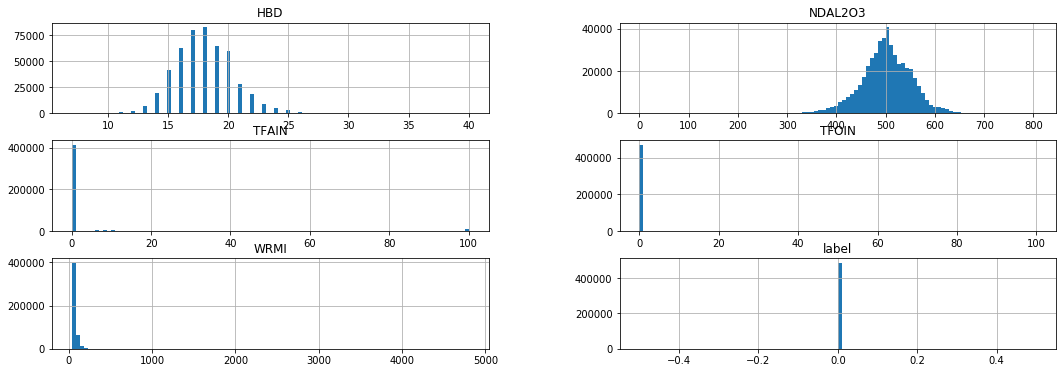

In [17]:
plt.figure(figsize=[18,6])
ax = plt.gca()
df2_index[df2_index["label"]==False].hist(bins=100, ax= ax)
plt.show()

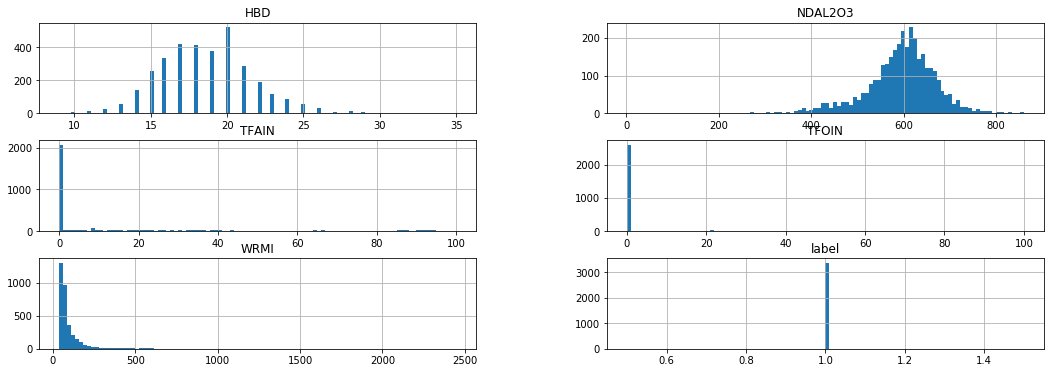

In [18]:
plt.figure(figsize=[18,6])
ax = plt.gca()
df2_index[df2_index["label"]==True].hist(bins=100, ax= ax)
plt.show()

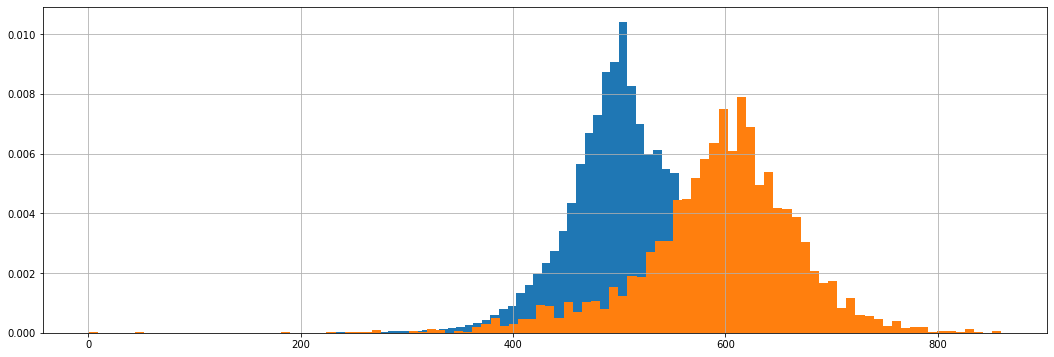

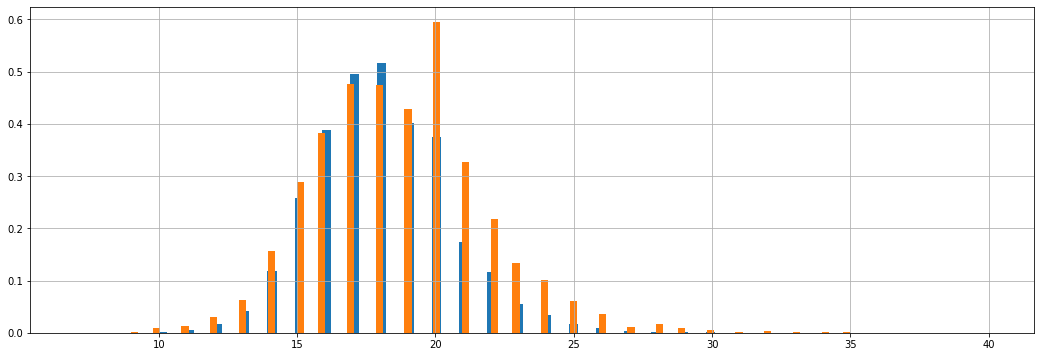

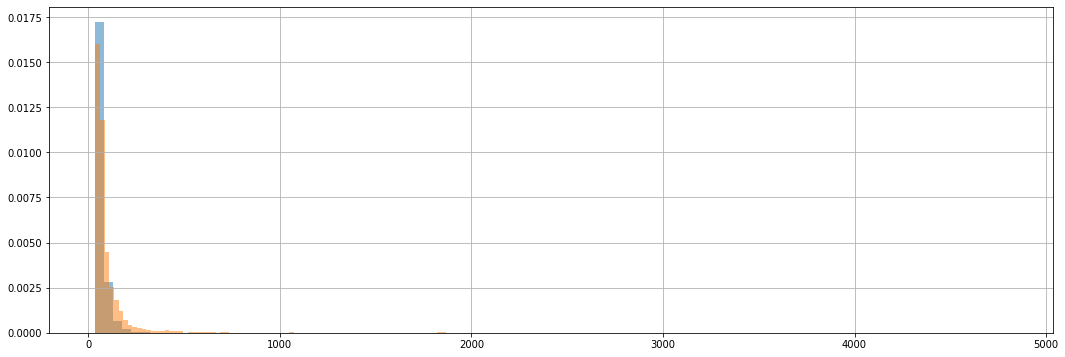

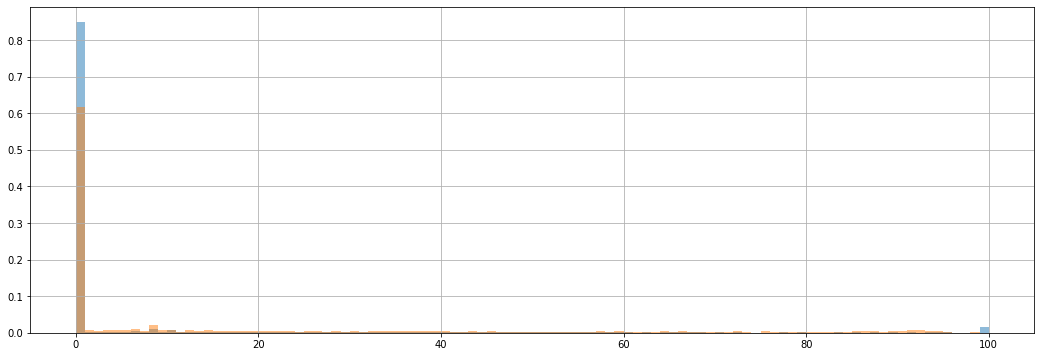

In [19]:
plt.figure(figsize=[18,6])
ax = plt.gca()
df2_index[df2_index["label"]==False]["NDAL2O3"].hist(bins=100, density=True)
df2_index[df2_index["label"]==True]["NDAL2O3"].hist(bins=100, density=True)
plt.show()
plt.figure(figsize=[18,6])
ax = plt.gca()
df2_index[df2_index["label"]==False]["HBD"].hist(bins=100, density=True)
df2_index[df2_index["label"]==True]["HBD"].hist(bins=100, density=True)
plt.show()
plt.figure(figsize=[18,6])
ax = plt.gca()
df2_index[df2_index["label"]==False]["WRMI"].hist(bins=100, density=True, alpha=0.5)
df2_index[df2_index["label"]==True]["WRMI"].hist(bins=100, density=True, alpha=0.5)
plt.show()
plt.figure(figsize=[18,6])
ax = plt.gca()
df2_index[df2_index["label"]==False]["TFAIN"].hist(bins=100, density=True, alpha=0.5)
df2_index[df2_index["label"]==True]["TFAIN"].hist(bins=100, density=True, alpha=0.5)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df2_index = df2_index.fillna(method="bfill")

In [22]:
df_train, df_test = train_test_split(df2_index, train_size=0.8, stratify = df2_index["label"])

In [23]:
df_train.head()

,,,HBD,WRMI,TFOIN,TFAIN,NDAL2O3,label
FT_TURNO,TU_SEMI_TURNO,CUBA,,,,,,
2019-12-09 00:00:00,2,7058,17.0,80.0,0.0,17.5069,495.0,False
2019-08-17 00:00:00,6,7028,19.0,55.0,0.0,0.0000,436.0,False
2019-06-11 00:00:00,3,8070,18.0,76.0,0.0,0.0000,527.0,False
2019-12-08 00:00:00,6,8055,18.0,114.0,0.0,48.7778,419.0,False
2019-08-19 00:00:00,2,8061,17.0,66.0,0.0,0.0000,477.0,False


In [24]:
df_test.head()

,,,HBD,WRMI,TFOIN,TFAIN,NDAL2O3,label
FT_TURNO,TU_SEMI_TURNO,CUBA,,,,,,
2019-10-14 00:00:00,2,8116,19.0,63.0,0.0,0.0000,356.0,False
2019-08-29 00:00:00,6,8066,17.0,85.0,0.0,14.5823,482.0,False
2019-06-28 00:00:00,5,7076,16.0,71.0,0.0,0.0000,515.0,False
2019-08-14 00:00:00,4,8011,16.0,57.0,0.0,0.0000,436.0,False
2019-12-19 00:00:00,5,7013,21.0,105.0,0.0,43.8086,439.0,False


In [25]:
(df_train["label"]==True).sum()/len(df_train)

0.006882668467389504

In [26]:
(df_test["label"]==True).sum()/len(df_test)

0.006880102742867627

In [35]:
from sklearn.naive_bayes import GaussianNB

In [28]:
clf = GaussianNB()

In [29]:
clf.fit(df_train.drop("label",axis=1), df_train["label"])

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
clf.score(df_test.drop("label",axis=1), df_test["label"])

0.9664556768492187

In [31]:
clf.score(df_train.drop("label",axis=1), df_train["label"])

0.9668556576248296

In [32]:
clf.class_prior_

array([0.99311733, 0.00688267])

In [33]:
clf.sigma_

array([[6.22320006e+00, 1.46449191e+03, 9.18628975e+01, 4.05647763e+02,
        2.73022594e+03],
       [9.84824282e+00, 2.59915964e+04, 4.65340108e+02, 7.36089183e+02,
        5.71685309e+03]])

In [34]:
clf.theta_

array([[ 18.02473482,  69.66513058,   1.39053028,   6.60000696,
        500.66198997],
       [ 18.65531285, 108.64309515,   9.05649626,  15.44164676,
        593.5579415 ]])

In [109]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np

In [50]:
y_true = 1*np.array(df_test["label"])

In [51]:
y_true[:5]

array([0, 0, 0, 0, 0])

In [52]:
y_pred = clf.predict_proba(df_test.drop("label",axis=1))

In [96]:
y_pred[:,1]

array([8.59360160e-05, 1.08610893e-04, 1.41738098e-04, ...,
       4.47668223e-04, 7.69335003e-05, 3.67724850e-04])

In [105]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred[:,1]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx]=(tp/(tp+fp))
    FPR[idx]=(fp/(fp+tn))

/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [106]:
from matplotlib import pyplot as plt

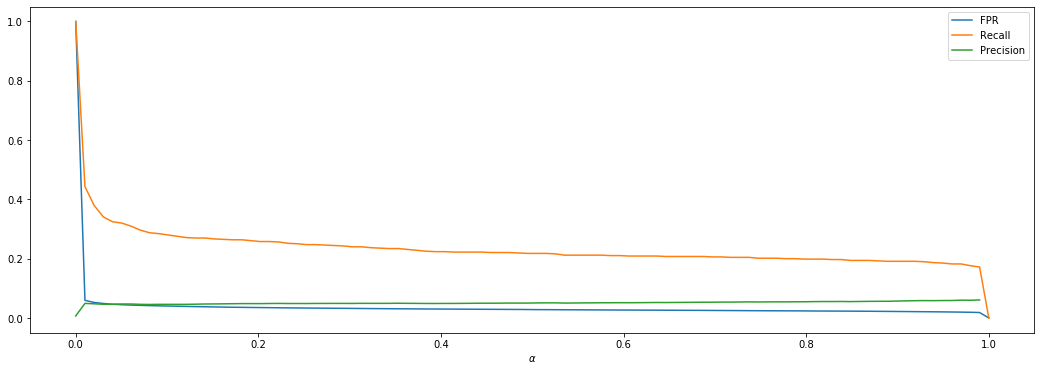

In [107]:
plt.figure(figsize=[18,6])
plt.plot(alfas,FPR, label="FPR")
plt.plot(alfas,recalls, label="Recall")
plt.plot(alfas,precisions, label="Precision")
plt.legend()
plt.xlabel("$\\alpha$")
plt.show()

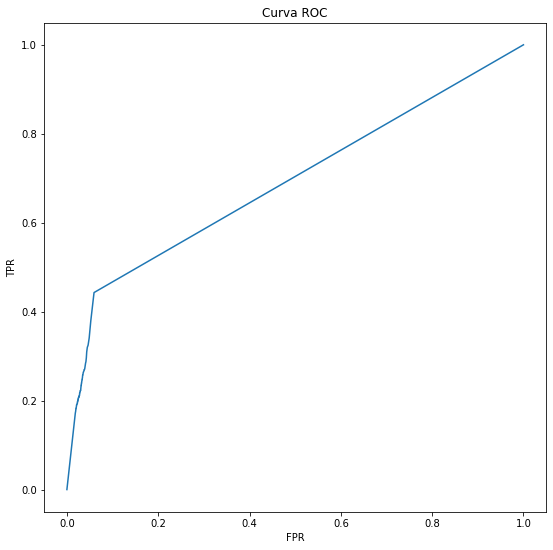

In [108]:
plt.figure(figsize=[9,9])
plt.plot(FPR,recalls)
plt.title("Curva ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [110]:
roc_auc_score(y_true, y_pred[:,1])

0.8705892535802013

In [26]:
N = len(df2_index)-df2_index["NIANO"].isna().sum()
for niano in nianos:
    print(niano)
    print((df2_index["NIANO"]==niano).sum()/N)
    print((df2_index["NIANO"]==niano).sum())
    print()

0
0.9826131804690303
482015

1
0.012029501940702568
5901

2
0.005020956326038032
2463

3
0.0002303565021690205
113

4
9.17348902443002e-05
45

5
6.115659349620014e-06
3

6
6.115659349620014e-06
3

8
2.0385531165400047e-06
1



In [13]:
df2_index["label"] = (df2_index["NIANO"]!=0)

125776

In [94]:
cubas = df2_index.index.levels[2]
idx = pd.IndexSlice


In [95]:
cubas[0]

501

In [96]:
df2_index.loc[idx[:,:, 501], ["INDPOT"]].head(7)

INDPOT
FT_TURNO            TU_SEMI_TURNO CUBA        
2019-06-01 00:00:00 1             501        1
                    2             501        1
                    3             501        1
                    4             501        1
                    5             501        1
                    6             501        1
2019-06-02 00:00:00 1             501        1

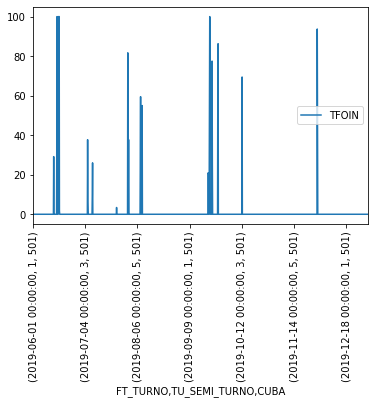

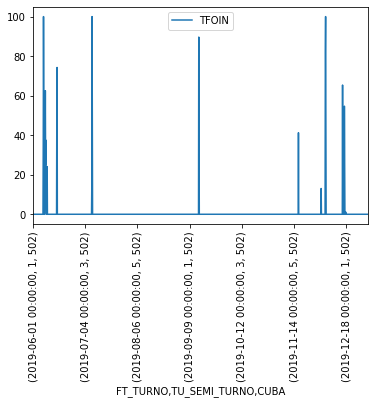

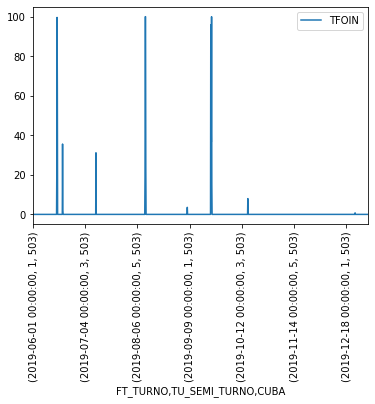

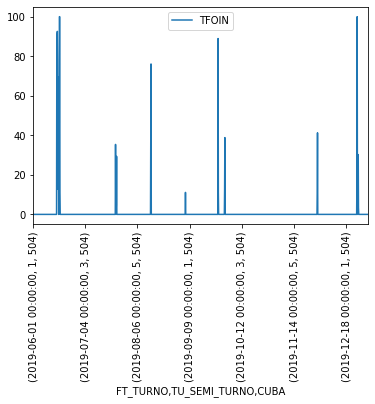

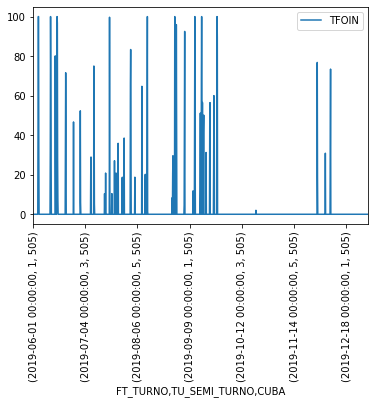

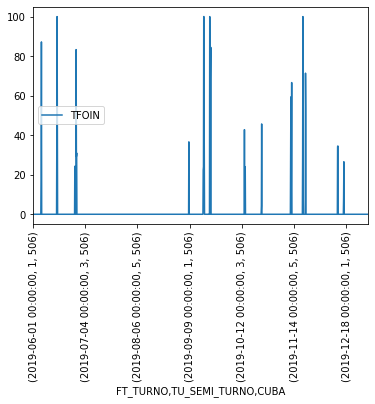

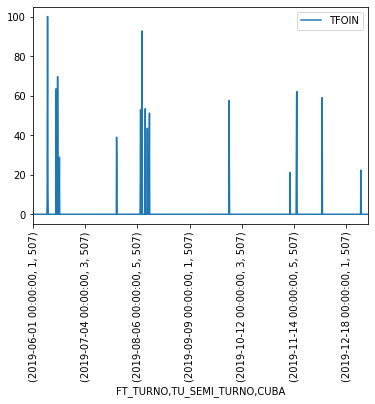

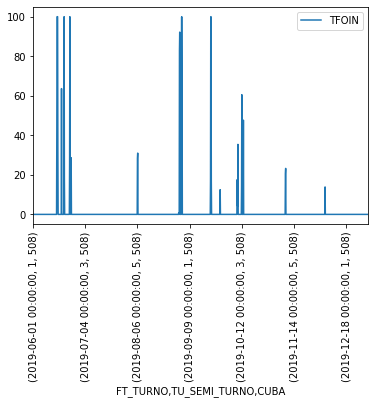

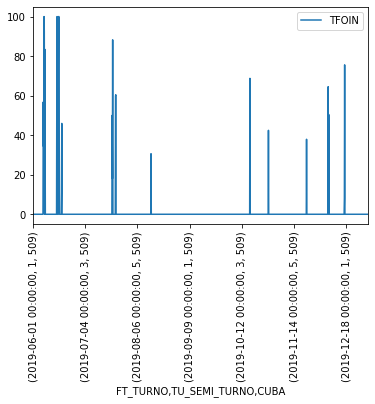

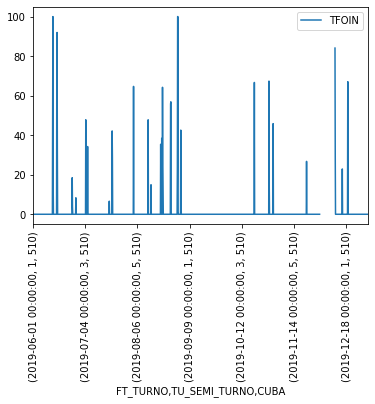

In [100]:
for val in range(10):
    df2_index.loc[idx[:,:, cubas[val]], ["TFOIN"]].plot(label=f'CUBA={cubas[val]}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

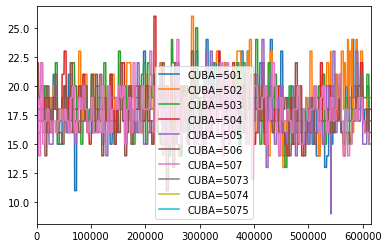

In [34]:
for idx in range(10):
    df2[df2["CUBA"]==cubas[idx]]["HBD"].plot(label=f'CUBA={cubas[idx]}')
plt.legend()
plt.show()

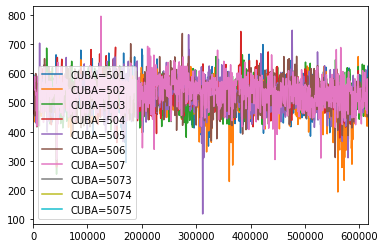

In [35]:
for idx in range(10):
    df2[df2["CUBA"]==cubas[idx]]["NDAL2O3"].plot(label=f'CUBA={cubas[idx]}')
plt.legend()
plt.show()

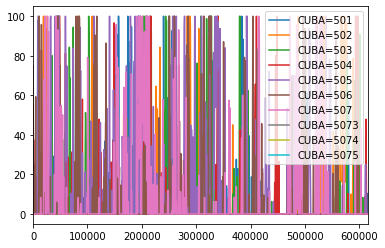

In [36]:
for idx in range(10):
    df2[df2["CUBA"]==cubas[idx]]["TFAIN"].plot(label=f'CUBA={cubas[idx]}')
plt.legend()
plt.show()

Int64Index([ 501,  502,  503,  504,  505,  506,  507,  508,  509,  510,
            ...
            8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120],
           dtype='int64', name='CUBA', length=480)

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [104]:
df2[df2["CUBA"]==cubas[idx]]["TFAIN"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [115]:
df2_index["DIFF"] = None

In [116]:
df2_index.head()

INDPOT   HBD  WRMI  TFOIN    TFAIN  \
FT_TURNO            TU_SEMI_TURNO CUBA                                       
2019-06-01 00:00:00 1             501        1  18.0  52.0    0.0   0.0000   
                                  502        2  18.0  55.0    0.0   0.0000   
                                  503        3  18.0  53.0    0.0   0.0000   
                                  504        4  18.0  72.0    0.0  11.0116   
                                  505        5  15.0  68.0    0.0   0.0000   

                                        NDAL2O3  NTEA  NIANO  DIFF  
FT_TURNO            TU_SEMI_TURNO CUBA                              
2019-06-01 00:00:00 1             501     556.0   0.0      0  None  
                                  502     526.0   0.0      0  None  
                                  503     484.0   0.0      0  None  
                                  504     548.0   0.0      0  None  
                                  505     516.0   0.0      0  None

In [119]:
df2_index ["DIFF"] = df2_index.loc[idx[:,:, 501], ["INDPOT"]].diff()

In [122]:
df2_index.loc[idx[:,:, 501], ["DIFF"]]

DIFF
FT_TURNO            TU_SEMI_TURNO CUBA      
2019-06-01 00:00:00 1             501    NaN
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-06-02 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-06-03 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-06-04 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-06-05 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
...                                      ...
2019-12-27 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-12-28 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-12-29 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-12-30 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0
2019-12-31 00:00:00 1             501    0.0
                    2             501    0.0
                    3             501    0.0
                    4             501    0.0
                    5             501    0.0
                    6             501    0.0

[1284 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e5a356160>]],
      dtype=object)

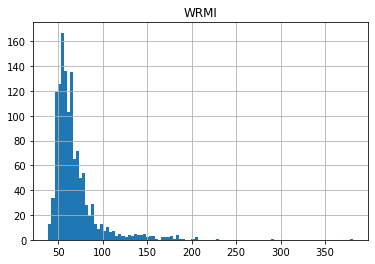

In [126]:
df2_index.loc[idx[:,:, 501], ["WRMI"]].hist(bins=100)

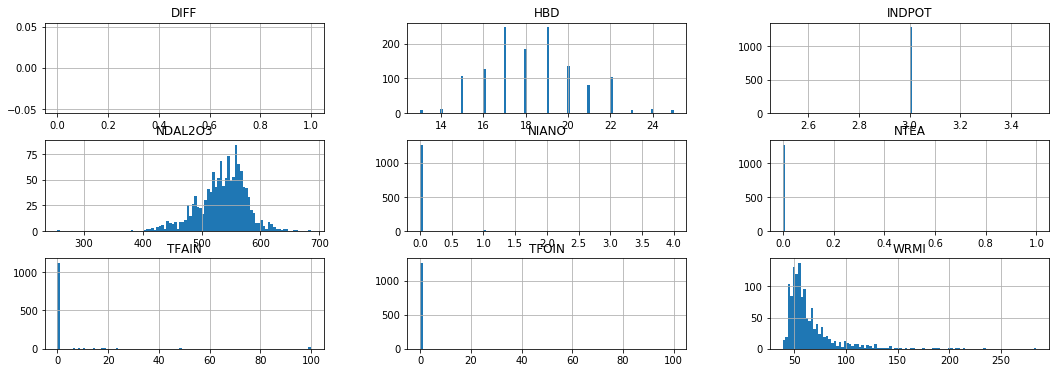

In [134]:
plt.figure(figsize=[18,6])
ax= plt.gca()
df2_index.loc[idx[:,:, 503], :].hist(bins=100,ax=ax)
plt.show()

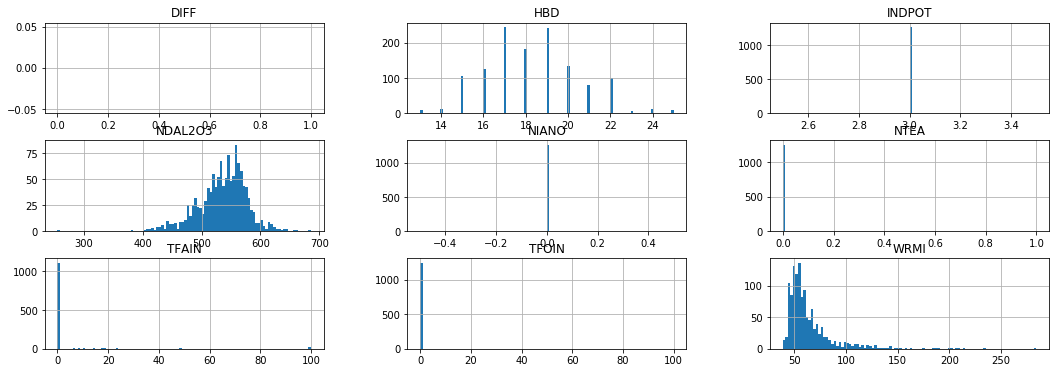

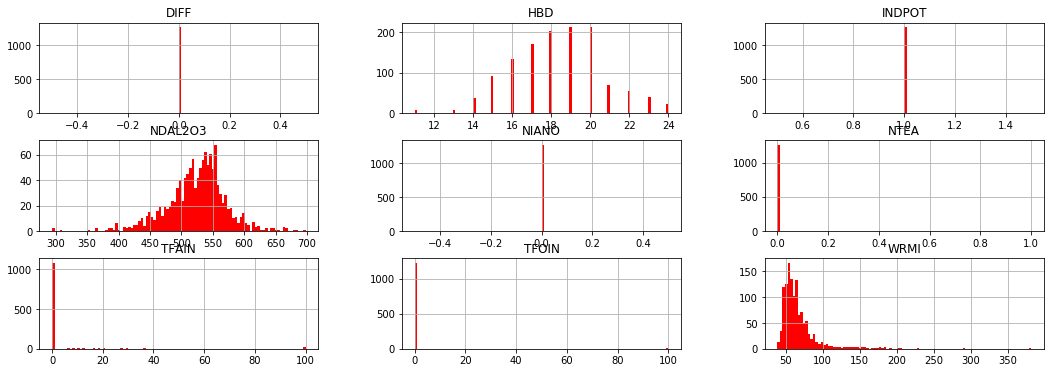

In [147]:
plt.figure(figsize=[18,6])
ax= plt.gca()
df2_index.loc[idx[:,:, 503], :][df2_index.loc[idx[:,:, 503], "NIANO"] == 0 ].hist(bins=100, ax=ax)
plt.show()
plt.figure(figsize=[18,6])
ax= plt.gca()
df2_index.loc[idx[:,:, 501], :][df2_index.loc[idx[:,:, 501], "NIANO"] == 0 ].hist(bins=100, ax=ax,color="r")
plt.show()

In [160]:
for i in range(8):
    df2_index.loc[idx[:,:, :], :][df2_index.loc[idx[:,:, :], "NIANO"] == i ].interpolate()
    print (df2_index.loc[idx[:,:, :], :][df2_index.loc[idx[:,:, :], "NIANO"] == i ].count())

INDPOT     607790
HBD        481741
WRMI       482030
TFOIN      480178
TFAIN      481862
NDAL2O3    481999
NTEA       482015
NIANO      607790
DIFF         1267
dtype: int64
INDPOT     5902
HBD        5892
WRMI       5901
TFOIN      5886
TFAIN      5899
NDAL2O3    5901
NTEA       5901
NIANO      5902
DIFF          7
dtype: int64
INDPOT     2463
HBD        2463
WRMI       2463
TFOIN      2451
TFAIN      2463
NDAL2O3    2463
NTEA       2463
NIANO      2463
DIFF          9
dtype: int64
INDPOT     113
HBD        113
WRMI       113
TFOIN      113
TFAIN      113
NDAL2O3    113
NTEA       113
NIANO      113
DIFF         0
dtype: int64
INDPOT     45
HBD        45
WRMI       45
TFOIN      45
TFAIN      45
NDAL2O3    45
NTEA       45
NIANO      45
DIFF        0
dtype: int64
INDPOT     3
HBD        3
WRMI       3
TFOIN      2
TFAIN      3
NDAL2O3    3
NTEA       3
NIANO      3
DIFF       0
dtype: int64
INDPOT     3
HBD        3
WRMI       3
TFOIN      3
TFAIN      3
NDAL2O3    3
NTEA       3
NIA

In [164]:
df2_index.loc[idx[:,:, :], :][df2_index.loc[idx[:,:, :], "NIANO"] == 0 ].count()

INDPOT     607790
HBD        481741
WRMI       482030
TFOIN      480178
TFAIN      481862
NDAL2O3    481999
NTEA       482015
NIANO      607790
DIFF         1267
dtype: int64

In [165]:
df2_index.loc[idx[:,:, :], :][df2_index.loc[idx[:,:, :], "NIANO"] == 0 ] = df2_index.loc[idx[:,:, :], :][df2_index.loc[idx[:,:, :], "NIANO"] == 0 ].interpolate()

In [166]:
df2_index.loc[idx[:,:, :], :][df2_index.loc[idx[:,:, :], "NIANO"] == 0 ].count()

INDPOT     607790
HBD        481741
WRMI       482030
TFOIN      480178
TFAIN      481862
NDAL2O3    481999
NTEA       482015
NIANO      607790
DIFF         1267
dtype: int64

In [155]:
df2_index.loc[idx[:,:, 502], "NIANO"].unique()

array([0, 1, 2, 4])

In [180]:
for cuba in cubas:
    print(cuba)
    print(df2_index.loc[idx[:,:, cuba], :][df2_index.loc[idx[:,:, cuba], "NIANO"] == 0 ].isna().sum())

501
INDPOT     0
HBD        0
WRMI       0
TFOIN      0
TFAIN      0
NDAL2O3    0
NTEA       0
NIANO      0
DIFF       1
dtype: int64
502
INDPOT        0
HBD           0
WRMI          0
TFOIN         0
TFAIN         0
NDAL2O3       0
NTEA          0
NIANO         0
DIFF       1255
dtype: int64
503
INDPOT        0
HBD           0
WRMI          0
TFOIN         0
TFAIN         0
NDAL2O3       0
NTEA          0
NIANO         0
DIFF       1266
dtype: int64
504
INDPOT        0
HBD           0
WRMI          0
TFOIN         0
TFAIN         0
NDAL2O3       0
NTEA          0
NIANO         0
DIFF       1271
dtype: int64
505
INDPOT        0
HBD           0
WRMI          0
TFOIN         0
TFAIN         0
NDAL2O3       0
NTEA          0
NIANO         0
DIFF       1267
dtype: int64
506
INDPOT        0
HBD           0
WRMI          0
TFOIN         0
TFAIN         0
NDAL2O3       0
NTEA          0
NIANO         0
DIFF       1261
dtype: int64
507
INDPOT        0
HBD           0
WRMI          0
TFOIN    

In [189]:
df2_index.loc[idx[:,:, 8118], :].fillna(method="bfill").isna()

INDPOT    HBD   WRMI  TFOIN  TFAIN  \
FT_TURNO            TU_SEMI_TURNO CUBA                                       
2019-06-01 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-06-02 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-06-03 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-06-04 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-06-05 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
...                                        ...    ...    ...    ...    ...   
2019-12-27 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-12-28 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-12-29 00:00:00 1             8118   False  False  False  False  False   
                    2             8118   False  False  False  False  False   
                    3             8118   False  False  False  False  False   
                    4             8118   False  False  False  False  False   
                    5             8118   False  False  False  False  False   
                    6             8118   False  False  False  False  False   
2019-12-30 00:00:00 1             8118   False  False  False  